# Interval Midpoint Rule

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
from typing import List

In [3]:
def f(x: float) -> float:
    return math.sqrt((1 - x**2))

def get_ci(m: int, i: int) -> float:
    return 1 / (2 * m) + (i - 1) / m

def midpoint_estimator(m: int) -> float:
    fm_bar: float = 0
    b_i: float = 1/m

    for i in range(1, m +1):
        ci: float = get_ci(m=m, i=i)
        fm_bar += b_i * f(ci)

    return fm_bar

def compute_error(f_bar_m: float) -> float:
    return math.fabs(f_bar_m - (math.pi/4))

Text(0, 0.5, 'Estimatino Error')

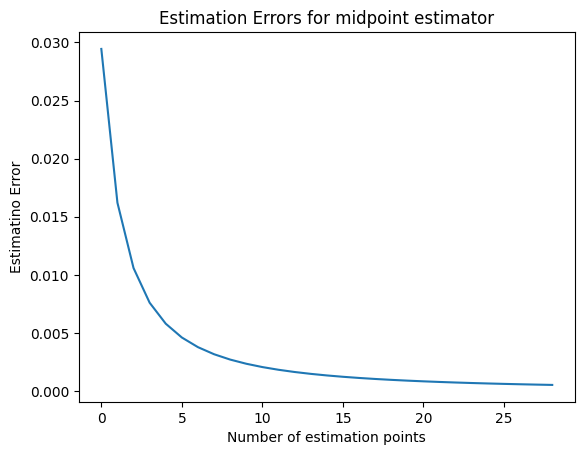

In [4]:
errors: List[float] = []
estimator: List[float] = []
ms: range = range(2, 31, 1)

for m in ms:
    fm_bar: float = midpoint_estimator(m)
    error: float = compute_error(f_bar_m=fm_bar)
    estimator.append(fm_bar)
    errors.append(error)

plt.plot(errors)
plt.title("Estimation Errors for midpoint estimator")
plt.xlabel("Number of estimation points")
plt.ylabel("Estimatino Error")

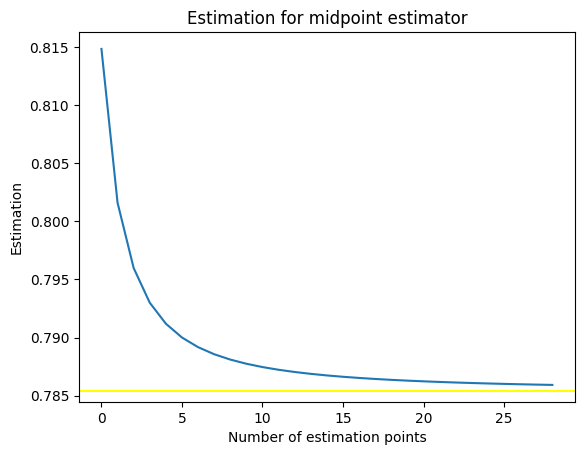

In [5]:
plt.plot(estimator)
plt.title("Estimation for midpoint estimator")
plt.xlabel("Number of estimation points")
plt.ylabel("Estimation")
plt.axhline(math.pi/4, c="yellow")

# Using quadrature points

In [6]:
bi_s: List[float] = [4/9, 5/18, 5/18]
ci_s: List[float] = [0, math.sqrt(3/5), -1 * math.sqrt(3/5)]

fm_bar_quadrature: float = 0
for bi, ci in zip(bi_s, ci_s):
    fm_bar_quadrature += bi * 1/2*(f(ci))

error: float = compute_error(f_bar_m=fm_bar_quadrature)


In [7]:
# mid point errors
print(f"The Midpoint   Error for M=3: {errors[2]}")
print(f"The Quadrature Error for M=3: {error}")

The Midpoint   Error for M=3: 0.010584141755528242
The Quadrature Error for M=3: 0.38749384894364947


# Monte Carlo

In [8]:
def sample() -> np.array:
    x: float = random.uniform(0, 1)
    y: float = random.uniform(0, 1)

    return x*x + y*y

def get_m_samples(m: int) -> List[int]:
    samples: List[int] = []
    for _ in range(m):
        s = sample()
        samples.append(1 if s <= 1 else 0)

    return samples

In [9]:
number_of_samples: range = range(50, 501, 10)

approximations: List[float] = []
for m in number_of_samples:
    s: List[int] = get_m_samples(m=m)
    area: float = sum(s) / m
    approximations.append(area)

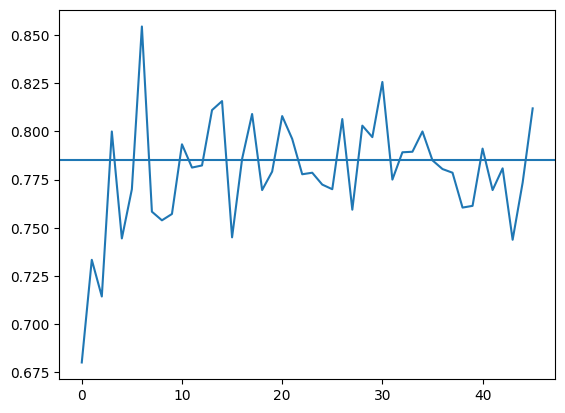

In [10]:
plt.plot(approximations)
plt.axhline(math.pi/4)

# Compute the function approximation for 100k samples and compute the error

In [11]:
approximation: float = sum(get_m_samples(m=100000)) / 100000
error: float = compute_error(f_bar_m=approximation)
error

0.0020681633974483082

Text(0.5, 1.0, 'function approximation after n samples X axis is /50')

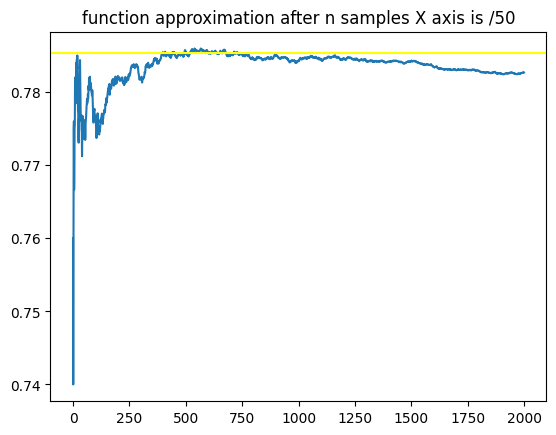

In [13]:
approximations: List[int]  = get_m_samples(m=100000)
estimations: List[float] = []

for i, m in enumerate(range(50, 100001, 50)):
    estimations.append(sum(approximations[0: m])/m)

plt.plot(estimations)
plt.axhline(math.pi/4, c="yellow")
plt.title("function approximation after n samples X axis is /50")

# Task 2

In [26]:
def f_(x: np.array)-> np.array:
    return 1 + 2 * x + x ** 2

def xi(m: int) -> float:
    return np.random.normal(1, math.sqrt(3), m)

In [29]:
M: range = range(1, 257, 2)
N: int = 10000
means: List[np.array] = []
variances: List[np.array] = []

for m in M:
    mean_approximations: List[np.array] = []
    var_approximations: List[float] = []
    for n in range(N):
        fm_bar: np.array = 1/m * np.sum((f_(xi(m=m))))
        mean_approximations.append(fm_bar)

    means.append(np.mean(mean_approximations))
    variances.append(np.var(mean_approximations))

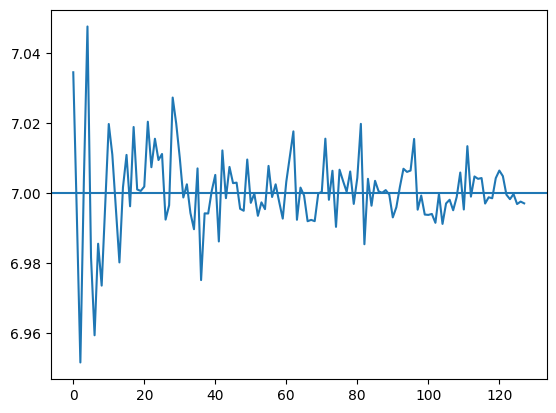

In [30]:
plt.plot(means)
plt.axhline(7)

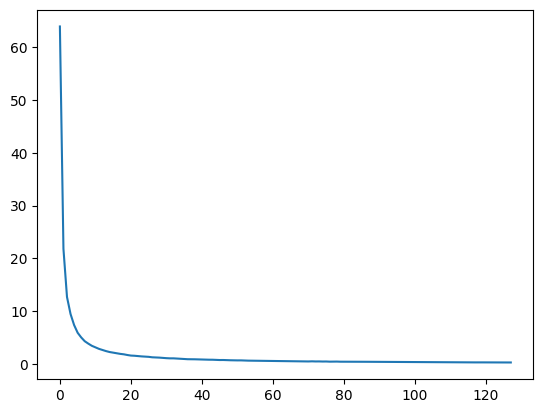

In [31]:
plt.plot(variances)